--------------------------------------------------------------------------------------------------------------------------------

**Assignment 1 - Data Science & Technologies PG (11523)**

**Name - Tejaswini Vallepu**

**Student ID - u3235439**

--------------------------------------------------------------------------------------------------------------------------------




## Part A - Importing and Understanding Data

--------------------------------------------------------------------------------------------------------------------------------


### 1 - Import Libraries Required


In [5]:
# Importing libraries required for Part A

import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import plotly.express as px

### 2 - Load the data and Display the first few rows of the dataset

In [6]:
# Loading the dataset to read

data_zomato_df = pd.read_csv('zomato_df_final_data.csv')

#Displaying/reviewing the dataset

print(data_zomato_df.shape)

(10500, 17)


In [7]:
data_zomato_df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


### 3 - Data Exploartion

#### Q1. How many unique cuisines are served by Sydney restaurants?

*The restaurants in Sydney, each of which specialises in a different type of cuisine, contribute to the city's diverse restaurant scene by offering a variety of cuisines.*



In [8]:
# Counting the unique cuisines served by Sydney restaurants

unique_cuisine_list = [];

for obj in data_zomato_df['cuisine']:
    unique_cuisine_list.extend(ast.literal_eval(obj))
    
# printing the unique cuisines
    
print("Total number of unique cuisines : ",len(set(unique_cuisine_list)))

Total number of unique cuisines :  134


In [9]:
#Listing the unique cuisines

print("List of unique cuisines : ")
print(pd.Series(unique_cuisine_list).value_counts())

List of unique cuisines : 
Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64


Text(0.5, 1.0, 'Popular Unique Cuisines Frequency')

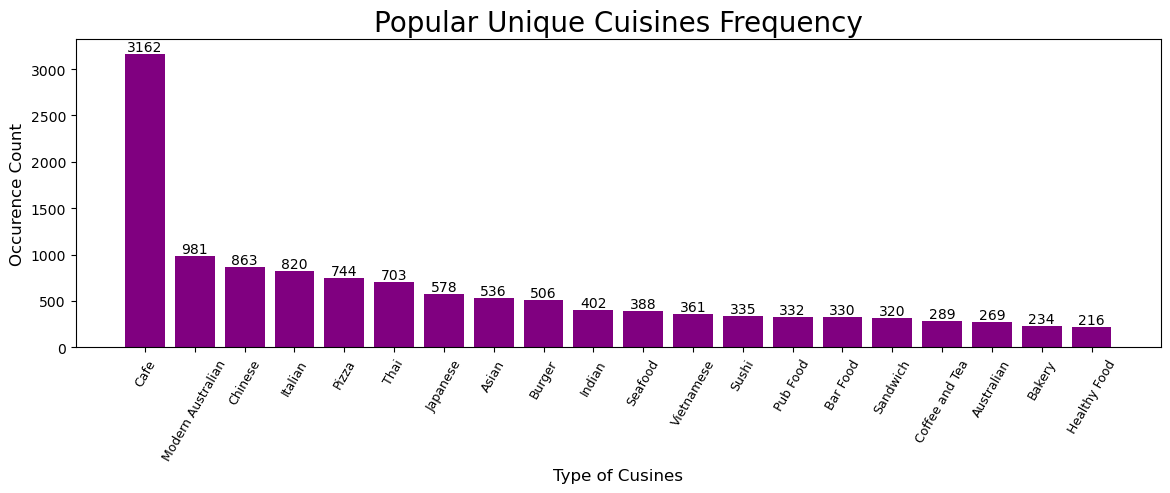

In [10]:
# Plotting the most popular unique cuisines 

fig, uc = plt.subplots(figsize = (14,4))
uc.bar(pd.Series(unique_cuisine_list).value_counts().index[0:20],
        pd.Series(unique_cuisine_list).value_counts().values[0:20], 
        color = "purple")
uc.set_ylabel("Occurence Count", size = 12)
uc.set_xlabel("Type of Cusines", size = 12)
plt.xticks(rotation=60, size=9)
for cont in uc.containers:
    uc.bar_label(cont)
uc.set_title("Popular Unique Cuisines Frequency", size = 20)


#### Q2. Which suburbs (top-3) have the highest number of restaurants?

*The Central Business District (CBD), Surry Hills, and Paramatta are the top three suburbs in terms of the highest number of restaurants, which is indicative of a thriving restaurant scene in these locations.*

In [11]:
# Find the top 3 suburbs with the highest number of restaurants
top_suburb_count = data_zomato_df['subzone'].value_counts()
print("Top three suburbs with highest number of restaurants : ", top_suburb_count.index[:3].tolist())


Top three suburbs with highest number of restaurants :  ['CBD', 'Surry Hills', 'Parramatta']


Text(0.5, 1.0, 'Top six Suburbs with highest number of restraunts')

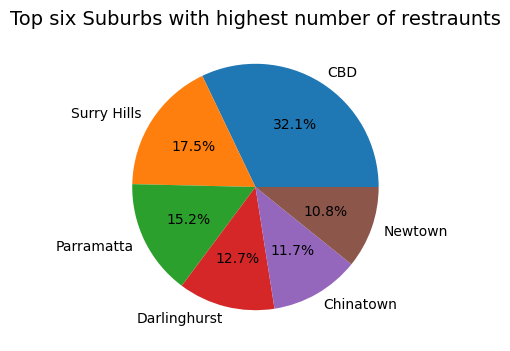

In [12]:
# Plotting and displaying the number of restaurants in top six suburbs

fig, tc = plt.subplots(figsize = (14,4))
mylabels = top_suburb_count.index[0:6].tolist()
tc.pie(top_suburb_count.values[0:6], labels = mylabels, autopct='%1.1f%%')
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=60, size=9)
tc.set_title("Top six Suburbs with highest number of restraunts", size = 14)


### Q3. Support for agreement/disagreement on the statement about restaurant ratings and cost.

*The interactive chart illustrates that although there is a correlation between the rating of a restaurant and the cost, there are also exceptions to this rule. There are restaurants with good ratings that charge reasonable prices, and there are restaurants with low ratings that charge extremely high prices.*

In [13]:
# relating 'cost' to 'rating_text'

data_zomato_df['cost'].min()
data_zomato_df['cost'].max()
data_zomato_df['cost'].mean()

data_zomato_df['cost_range'] = " "

for i in range(len(data_zomato_df)):
    if data_zomato_df.iloc[i]['cost'] < 40:
        data_zomato_df.at[i, 'cost_range'] = '0-40'
    elif data_zomato_df.iloc[i]['cost'] >=40 and data_zomato_df.iloc[i]['cost'] < 80:
        data_zomato_df.at[i, 'cost_range'] = '40-80'
    else:
        data_zomato_df.at[i, 'cost_range'] = '>80' 

Obj_temp = data_zomato_df.groupby(['rating_text', 'cost_range'])['cost_range'].agg({"count"})

relate_cost_rating = Obj_temp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

print(math.trunc(float(relate_cost_rating.values[11])),"% of restaurants with poor rating are expensive, whereas, ",math.trunc(float(relate_cost_rating.values[5])),"% restaurants with excellent rating are expensive.")

22 % of restaurants with poor rating are expensive, whereas,  39 % restaurants with excellent rating are expensive.


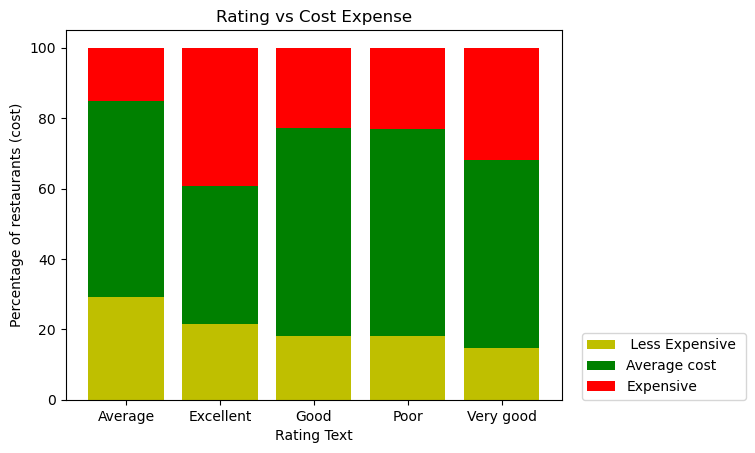

In [14]:
# Plotting 'cost' to 'rating_text'

xp = ["Average", "Excellent", "Good", "Poor", "Very good"]

yp1 = np.array(relate_cost_rating.iloc[::3]['count'])
yp2 = np.array(relate_cost_rating.iloc[1::3]['count'])
yp3 = np.array(relate_cost_rating.iloc[2::3]['count'])

plt.bar(xp, yp1, color='y')
plt.bar(xp, yp2, bottom=yp1, color='g')
plt.bar(xp, yp3, bottom=yp1+yp2, color='r')
plt.xlabel("Rating Text")
plt.ylabel("Percentage of restaurants (cost)")
plt.legend([" Less Expensive ", "Average cost", "Expensive"], loc=(1.04, 0))
plt.title("Rating vs Cost Expense")
plt.show()

### 4 - Exploratory Data Analysis


Text(0.5, 1.0, 'Distribution of Cost')

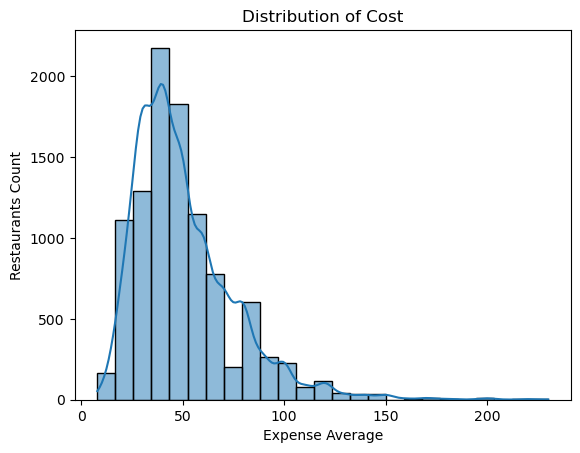

In [15]:
# Analysis 1: Singlevariant Analysis

# histogram - Cost distribution 

cost_dist = data_zomato_df[data_zomato_df['cost'] < 250]
sns.histplot(data = cost_dist, x="cost", bins=25, kde=True)
plt.xlabel("Expense Average")
plt.ylabel("Restaurants Count")
plt.title("Distribution of Cost")

*This graph demonstrates that the cost variable has a significant lean to the right i.e., right skewed, and that there is the potential for outliers. It appears that all of the restaurants have prices that average somewhere around fifty dollars.*


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

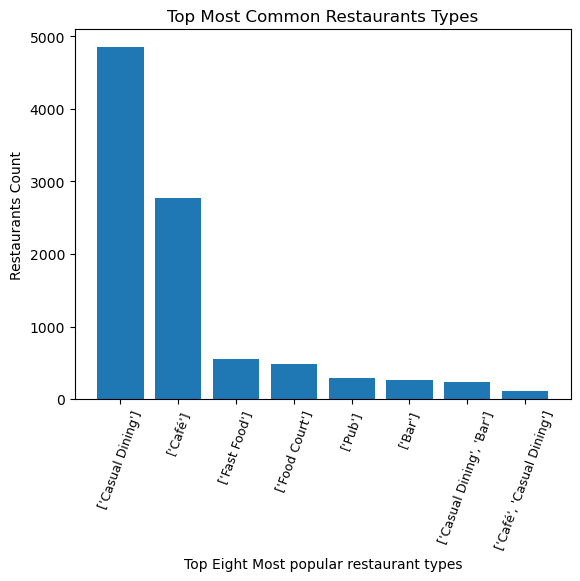

In [16]:
# distribution of Type

top_ten_types = data_zomato_df.groupby(['type'])['type'].count().sort_values(ascending=False)[:8]
plt.bar(x = top_ten_types.index, height= top_ten_types.values)
plt.xlabel("Top Eight Most popular restaurant types")
plt.ylabel("Restaurants Count")
plt.title("Top Most Common Restaurants Types")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)


*The most popular restaurant types in Sydney are casual dining and cafes, indicating that they are also the most common types in general.*



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, "['Casual Dining']"),
  Text(1, 0, "['Café']"),
  Text(2, 0, "['Casual Dining', 'Bar']"),
  Text(3, 0, "['Fast Food']"),
  Text(4, 0, "['Bar']"),
  Text(5, 0, "['Food Court']"),
  Text(6, 0, "['Café', 'Casual Dining']"),
  Text(7, 0, "['Pub']")])

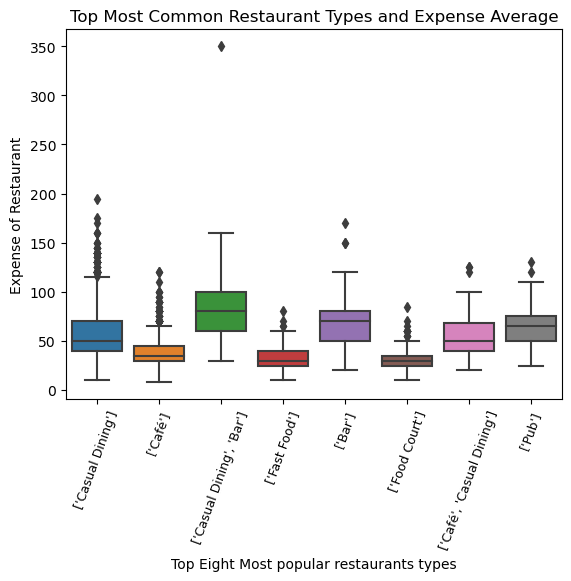

In [17]:
# Analysis 2: Bivariate Analysis

# Boxplot - Type versus Cost 

top_ten_types = data_zomato_df.groupby(['type'])['type'].count().sort_values(ascending=False)[:8]
type_cost = data_zomato_df[data_zomato_df['type'].isin(top_ten_types.index.tolist())]
sns.boxplot(data = type_cost, x="type", y="cost")
plt.xlabel("Top Eight Most popular restaurants types")
plt.ylabel("Expense of Restaurant")
plt.title("Top Most Common Restaurant Types and Expense Average")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)

*The above plotted graph demonstrates how the type of restaurant has a significant influence on the cost. When it comes to cost, fine dining is at the top.*


Text(0.5, 1.0, 'Expense Average versus Restaurant Rating')

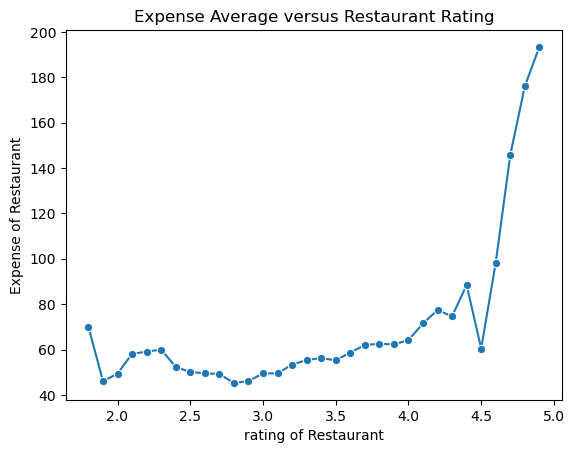

In [18]:
# Plotting Rating versus Average Cost

rating_avgCost = data_zomato_df.groupby('rating_number', as_index=False)['cost'].mean()
sns.lineplot(data = rating_avgCost, x="rating_number", y="cost", marker="o")
plt.xlabel("rating of Restaurant")
plt.ylabel("Expense of Restaurant")
plt.title("Expense Average versus Restaurant Rating")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, "['Modern Australian']"),
  Text(1, 0, "['Cafe']"),
  Text(2, 0, "['Chinese']"),
  Text(3, 0, "['Italian', 'Pizza']"),
  Text(4, 0, "['Italian']"),
  Text(5, 0, "['Thai']"),
  Text(6, 0, "['Indian']"),
  Text(7, 0, "['Pub Food']")])

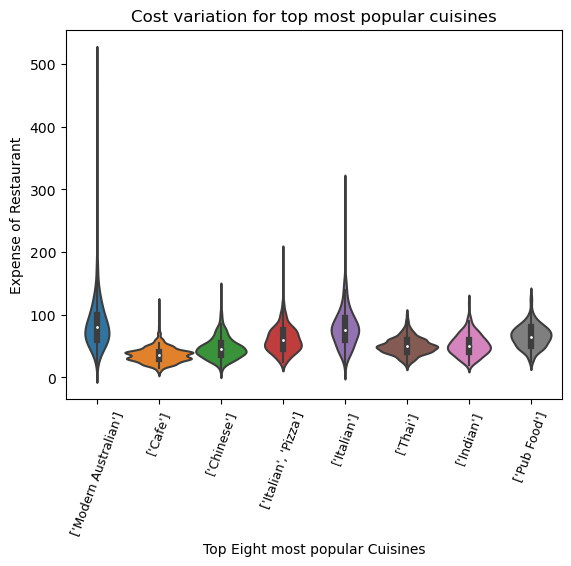

In [19]:
# Plotting Cuisine vresus Cost Average

top_ten_types = data_zomato_df.groupby(['cuisine'])['cuisine'].count().sort_values(ascending=False)[:8]
Cuisine_CostAvg = data_zomato_df[data_zomato_df['cuisine'].isin(top_ten_types.index.tolist())]
sns.violinplot(x ='cuisine', y ='cost', data = Cuisine_CostAvg, inner="box", width = 1.1)
plt.xlabel("Top Eight most popular Cuisines")
plt.ylabel("Expense of Restaurant")
plt.title("Cost variation for top most popular cuisines")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)

*It can be seen from this that the most expensive places in modern Australia range from ten dollars to three hundred dollars.*

Text(0.5, 1.0, ' Rating Frequency among different ranges of cost')

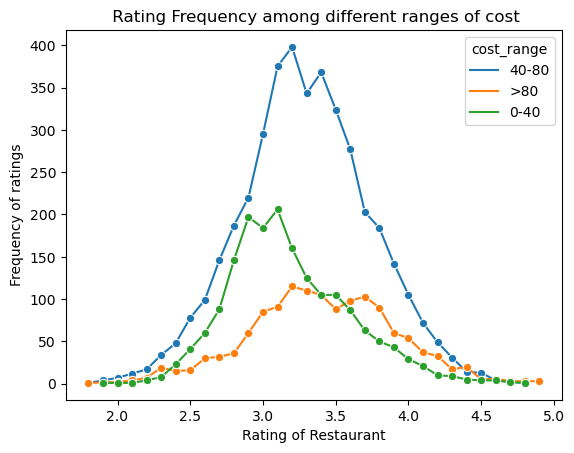

In [20]:
# Analysis 3: Multivariate Analysis

# distribution of Rating

Rating_Dist = data_zomato_df.groupby(['rating_number','cost_range'], as_index=False).size()
sns.lineplot(data = Rating_Dist, x="rating_number", y="size", marker = "o", hue = "cost_range")
plt.xlabel("Rating of Restaurant")
plt.ylabel("Frequency of ratings")
plt.title(" Rating Frequency among different ranges of cost")

*This shows that all of the restaurants have an average rating of about 3. There is a slight variation in the rating based on the price range. Ratings for average restaurants are slightly lower than those for expensive restaurants.*


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Blacktown'),
  Text(1, 0, 'Bondi Beach'),
  Text(2, 0, 'CBD'),
  Text(3, 0, 'Chinatown'),
  Text(4, 0, 'Darlinghurst'),
  Text(5, 0, 'Manly'),
  Text(6, 0, 'Newtown'),
  Text(7, 0, 'Parramatta'),
  Text(8, 0, 'Potts Point'),
  Text(9, 0, 'Surry Hills')])

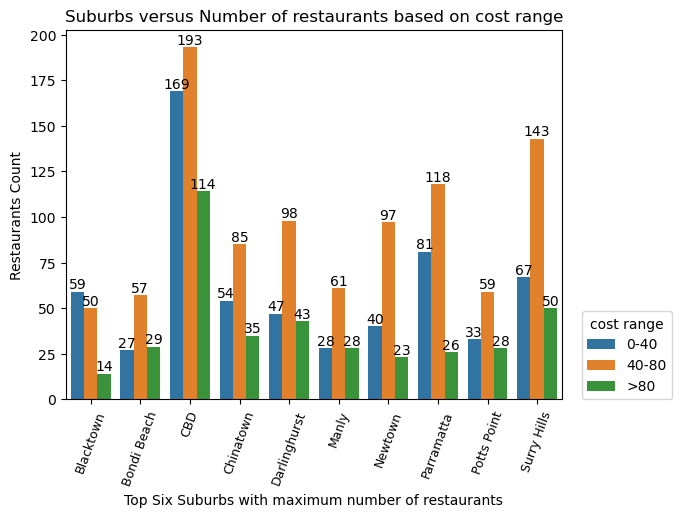

In [21]:
# Plotting suburb versus cost based on cost range

top_ten_types = data_zomato_df.groupby(['subzone'])['subzone'].count().sort_values(ascending=False)[:10]
suburb_cost = data_zomato_df[data_zomato_df['subzone'].isin(top_ten_types.index.tolist())]
suburb_cost = suburb_cost.groupby(['subzone', 'cost_range']).size().to_frame(name = 'size').reset_index()
ax = sns.barplot(data = suburb_cost, x="subzone", y="size" , hue = "cost_range")
for cont in ax.containers:
    ax.bar_label(cont)
plt.xlabel("Top Six Suburbs with maximum number of restaurants")
plt.ylabel("Restaurants Count")
plt.title("Suburbs versus Number of restaurants based on cost range")
plt.legend(title = 'cost range', loc=(1.04, 0))
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)

*There are many pricing ranges in each suburb. The data indicates that certain subzones have higher prices than the rest.*


## 5 - Produce a Cuisine Density Map correctly

The cuisine density map displays the distribution of Italian restaurants in Sydney and enables users to explore the locations of these places in an interactive manner.

In [22]:
# reading the json file and adjusting the path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the 'sydney.geojson' file
syd_geojson_path = "sydney.geojson"
syd_geojson_read = gpd.read_file(syd_geojson_path)
syd_geojson_read.head(3)

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."


In [23]:
# renaming the column name SSC_NAME as suburbs
syd_geojson_read.rename(columns = {'SSC_NAME':'suburbs'}, inplace = True)
syd_geojson_read.head(3)

,SSC_CODE,suburbs,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."


In [24]:
syd_geojson_read.shape

(494, 5)

In [25]:
# reading the zomato sydney data and adjusting the file path

syd_zomato_df = pd.read_csv("zomato_df_final_data.csv")
syd_zomato_df.head(3)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b


<AxesSubplot:>

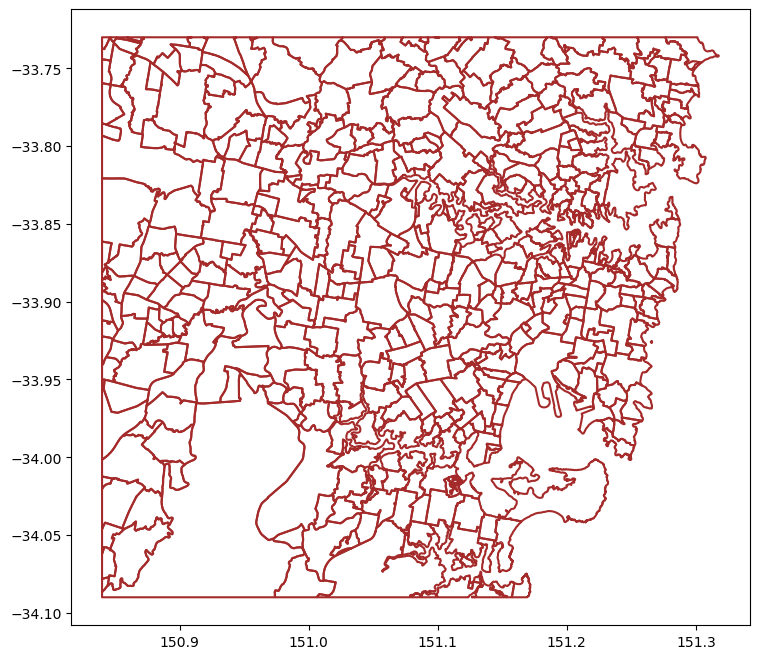

In [26]:
#plotting the sydeney geojson data

syd_geojson_read.boundary.plot(figsize=(14,8), color="brown")

In [27]:
# Viewing coordinate reference system of the sydney geojson dataframe

syd_geojson_read.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:xlabel='lng', ylabel='lat'>

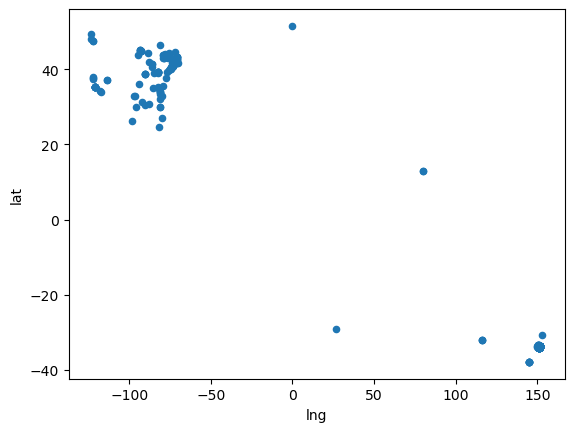

In [28]:
# latitude and longitude points from dataframe columns of the suburbs (zomato)

syd_zomato_df.plot(kind="scatter", x="lng", y="lat")

*After taking a look at the scatter plot that was just presented, we can conclude that it does not provide any information that is significant.*


In [29]:
# Zomato Pandas dataframe conversion to GeoPandas dataframe 

from geopandas import points_from_xy

syd_zomato_gpdf = gpd.GeoDataFrame(
    syd_zomato_df,
    crs = "EPSG:4326",
    geometry = points_from_xy(syd_zomato_df["lng"],syd_zomato_df["lat"]),
)
syd_zomato_gpdf.head(3)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b,POINT (151.20760 -33.87606)
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b,POINT (151.19379 -33.91100)
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b,POINT (151.19521 -33.86797)


In [30]:
# plotting a map of cuisine density using the cuisine name that was passed in during the function call

def syd_densityMap_cuisines(cuisineName):
    
    cuisine_data_df = syd_zomato_gpdf[syd_zomato_gpdf['cuisine'].str.contains(cuisineName)]
    
    syd_cuisine_gpdf = gpd.sjoin(
        cuisine_data_df,      
        syd_geojson_read,  
        how = "left",    
        op = "within",   
    )
    
    #groupby suburb and get the size
    syd_cuisine_gpdf_Suburb = syd_cuisine_gpdf.groupby("SSC_CODE").size()
    syd_cuisine_BySuburb = syd_cuisine_gpdf_Suburb.to_frame().reset_index()
    syd_cuisine_BySuburb.columns = ["SSC_CODE", "lisCount"]
    
    #merge json and dataframe and grouped by suburb
    merged_dataFile_Df = syd_geojson_read.merge(syd_cuisine_BySuburb, on = "SSC_CODE", how = "outer")
    
    #plotting the map with data
    fig, ax = plt.subplots(figsize = (12,10))
    syd_geojson_read.boundary.plot(ax = ax)
    merged_dataFile_Df.plot(
        column = "lisCount", 
        cmap="Greens",
        ax=ax,
        legend=True
    )
    

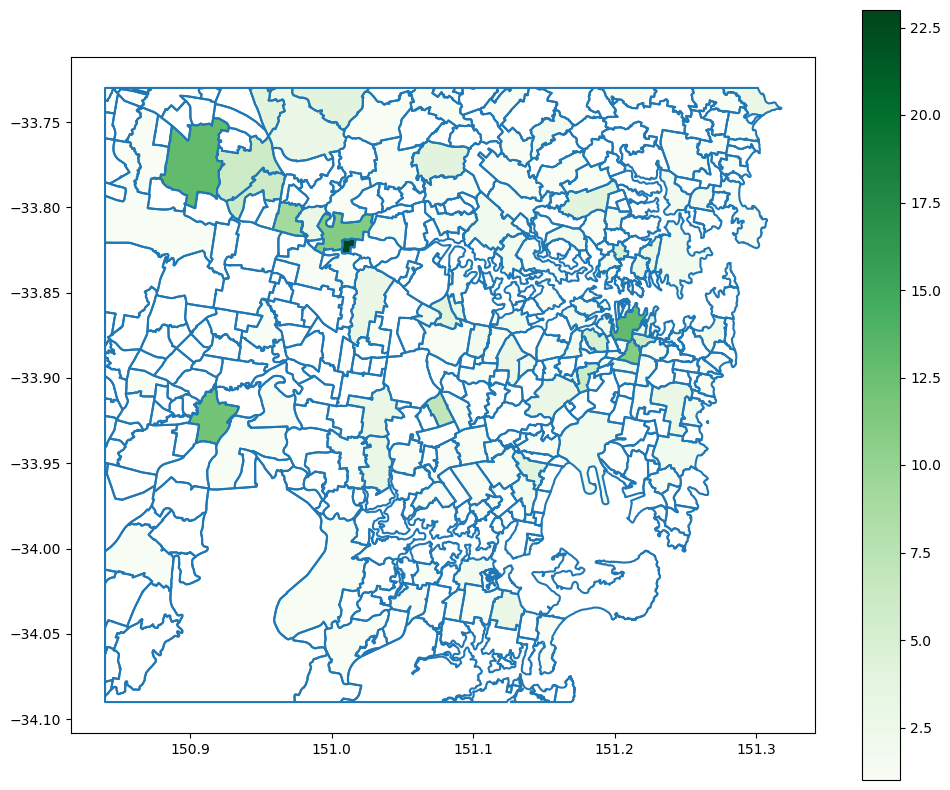

In [31]:
# plotting the suburbs for Indian cuisine and selecting the cuisine type.

cuisine_type = "Indian"
syd_densityMap_cuisines(cuisine_type)

----------------------------------------------------------------------------------------------------------------------------

## Part B - Predictive Modelling

--------------------------------------------------------------------------------------------------------------------------------


### 1 - Feature Engineering

In [32]:
# Data Cleaning i.e., cleaning the data

# Counting Na values

data_zomato_df.isna().sum() 

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
cost_range          0
dtype: int64

In [35]:
# threshold Drop

# Rows and columns with more than 70% missing data are being removed.
thrshld = 0.7

# Columns with a missing value rate greater than the threshold are dropped
data_zomato_df = data_zomato_df[data_zomato_df.columns[data_zomato_df.isnull().mean() < thrshld]]

# Rows having a missing value rate greater than the threshold are dropped
data_zomato_df = data_zomato_df.loc[data_zomato_df.isnull().mean(axis=1) < thrshld]

In [36]:
# No columns were deleted since none of the rows or columns met the criteria. So replacing each variable's na values. 

# Plotting the cost histogram revealed that the majority of restaurant 
# expenses are fairly close to the average, with little variation. 
# Therefore, use average cost in place of null rows for cost (Cost & cost_2).

data_zomato_df['cost'].fillna(data_zomato_df['cost'].mean(), inplace = True)
data_zomato_df['cost_2'].fillna(data_zomato_df['cost_2'].mean(), inplace = True)

In [37]:
# Lat & Long are connected to the suburb. 
# average lat and average lng for each suburb in which they are located can be used in place of the lat and long numbers.


for i in range(len(data_zomato_df)):
    if pd.isnull(data_zomato_df.iloc[i]['lat']):
        lat_long = data_zomato_df[data_zomato_df['subzone'] == data_zomato_df.iloc[i]['subzone']]
        data_zomato_df.at[i, 'lat'] = data_zomato_df['lat'].mean()
    if pd.isnull(data_zomato_df.iloc[i]['lng']):
        lat_long = data_zomato_df[data_zomato_df['subzone'] == data_zomato_df.iloc[i]['subzone']]
        data_zomato_df.at[i, 'lng'] = data_zomato_df['lng'].mean()

In [38]:
# determining the type's percentage of missing values

round(data_zomato_df['type'].isnull().mean(), 3)

0.005

In [39]:
# Type has only 0.005% missing values, so removing those specific rows would not affect the dataset

# Rating number, text, and votes are in the missing rows. 
# Since rating is a target variable
# eliminating those rows with three crucial missing attributes is better than imputing them.

data_zomato_df.dropna(inplace=True)
data_zomato_df.reset_index(drop=True, inplace=True)

In [40]:
# Feature Encoding

# Label encoding for text rating and labelencoder instance creation

label_encode = LabelEncoder() 

data_zomato_df['encoded_rating'] = label_encode.fit_transform(data_zomato_df['rating_text'])


*As rating_text has an order, and this encoding will not produce the same order while encoding, it is not a good method of encoding.*

In [42]:
# manual encoding
for i in range(len(data_zomato_df)):
    
    if data_zomato_df.at[i, 'rating_text'] == 'Poor':
       data_zomato_df.at[i, 'encoded_rating'] = 1
    elif data_zomato_df.at[i, 'rating_text'] == 'Average':
        data_zomato_df.at[i, 'encoded_rating'] = 2
    elif data_zomato_df.at[i, 'rating_text'] == 'Good':
        data_zomato_df.at[i, 'encoded_rating'] = 3
    elif data_zomato_df.at[i, 'rating_text'] == 'Very Good':
        data_zomato_df.at[i, 'encoded_rating'] = 4
    else:
        data_zomato_df.at[i, 'encoded_rating'] = 5

In [43]:
# The cost variable is significantly skewed, thus the noise in the data is removed by calculating the log of the cost.

data_zomato_df['cost'] = np.log(data_zomato_df['cost'])


### 2 - Regression

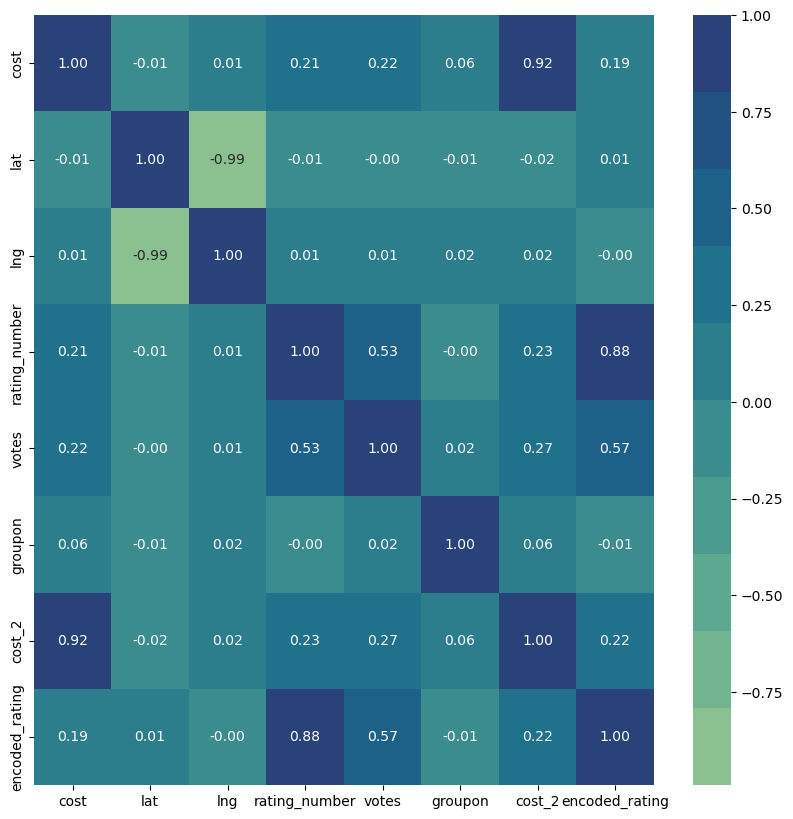

In [44]:
# using a heatmap to see how each variable is correlated

corln_mtrx = data_zomato_df.corr()

# Plotting figsize
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("crest", 10)
# Creating a heat map, enabling annotations, and adding floats to the  map
sns.heatmap(corln_mtrx, cmap=colormap, annot=True, fmt=".2f")
plt.show()

In [45]:
# The data frame being copied for modelling

data_zomato_df_LR = data_zomato_df.copy()

# Regression modelling can be used to predict the target variable by removing columns that are not useful. 

data_zomato_df_LR.drop(['address','phone','link','title','color',
                        'cuisine_color','cuisine','cost_2','subzone','groupon','type','rating_text','lat','lng','cost_range'], inplace=True, axis=1)

data_zomato_df_LR.head(1)

,cost,rating_number,votes,encoded_rating
0,3.912023,4.0,1311.0,4


In [46]:
# Select x and y from the dataset

x = data_zomato_df_LR.drop('rating_number', axis =1)
y = data_zomato_df_LR['rating_number']

In [47]:
# 80:20 training and testing data split, with 0 set as the random state

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [48]:
# 'rating_number' can be predicted by building a linear regression model and testing it on test data.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linear_model_LR = LinearRegression()

# model fitting
linear_model_LR.fit(x_train, y_train)

LinearRegression()

In [49]:
# Print the accuracy, MSE, and R-squared

print('Linear Regression Model R-Squared value is : \n', linear_model_LR.score(x_train, y_train))
y_prediction = linear_model_LR.predict(x_test) #Predicting using the test data
print('Linear Regression Model Mean-Squared-Error value is : \n',mean_squared_error(y_test, y_prediction))
print('Linear Regression Model Accuracy is : \n', round(linear_model_LR.score(x_train, y_train)*100,2))

Linear Regression Model R-Squared value is : 
 0.7747750970635094
Linear Regression Model Mean-Squared-Error value is : 
 0.04464432934758665
Linear Regression Model Accuracy is : 
 77.48


In [51]:
# fitting and prediction for Gradiant Descent model

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

grad_desc_model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=500, tol=1e-3))

grad_desc_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=500))])

In [52]:
# Print the accuracy, MSE, and R-squared

print('Gradient Descent Model R-Squared value is : \n', grad_desc_model.score(x_train, y_train))
y_prediction = grad_desc_model.predict(x_test)
print('Gradient Descent Model Root-Mean-Squared-Error value is : \n',mean_squared_error(y_test, y_prediction))
print('Gradient Descent Model Accuracy is : \n', round(grad_desc_model.score(x_train, y_train)*100,2))

Gradient Descent Model R-Squared value is : 
 0.7746709227789585
Gradient Descent Model Root-Mean-Squared-Error value is : 
 0.04471590655583842
Gradient Descent Model Accuracy is : 
 77.47


### 3 - Classificaton

In [54]:
data_zomato_df_CF = data_zomato_df.copy()

for i in range(len(data_zomato_df_CF)):
    if data_zomato_df_CF.at[i, 'encoded_rating'] == 1 or data_zomato_df_CF.at[i, 'encoded_rating'] == 2:
       data_zomato_df_CF.at[i, 'encoded_rating'] = 0
    else:
        data_zomato_df_CF.at[i, 'encoded_rating'] = 1

data_zomato_df_CF.drop(['cost_2','address','phone','link','title','color',
                           'cuisine_color','cuisine','lat','lng','subzone','rating_text','groupon','type','cost_range'], inplace=True, axis=1)

# Using rating_text as the target variable

X = data_zomato_df_CF.drop('encoded_rating', axis =1)
y = data_zomato_df_CF['encoded_rating'] 

In [55]:
# splitting the dataset into training and testing portions of 80% and 20% separate.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0) #splittind dataset 80:20

# Data should be normalised for numerical stability.

from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

# initialize the dictionary with keys for the first six binary classification methods

models = {}

In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic_Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support_Vector_Machines'] = LinearSVC(dual=False)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision_Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random_Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K_Nearest_Neighbor'] = KNeighborsClassifier()


from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix

accuracy, precision, recall = {}, {}, {}

In [58]:
for key in models.keys():
    
    # Fitting the classifier
    models[key].fit(X_train, y_train)
    
    # Making predictions
    prediction = models[key].predict(X_test)
    
    # Calculating metrics
    accuracy[key] = accuracy_score(prediction, y_test)
    precision[key] = precision_score(prediction, y_test)
    recall[key] = recall_score(prediction, y_test) 
    
# All of the binary classification models' accuracy, precision, and recall numbers are to be printed.

df_classify_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_classify_model['Accuracy'] = accuracy.values()
df_classify_model['Precision'] = precision.values()
df_classify_model['Recall'] = recall.values()
df_classify_model

,Accuracy,Precision,Recall
Logistic_Regression,1.000000,1.000000,1.000000
Support_Vector_Machines,1.000000,1.000000,1.000000
Decision_Trees,1.000000,1.000000,1.000000
Random_Forest,1.000000,1.000000,1.000000
Naive Bayes,0.882763,0.699029,0.965147
K_Nearest_Neighbor,0.997209,0.998058,0.994197


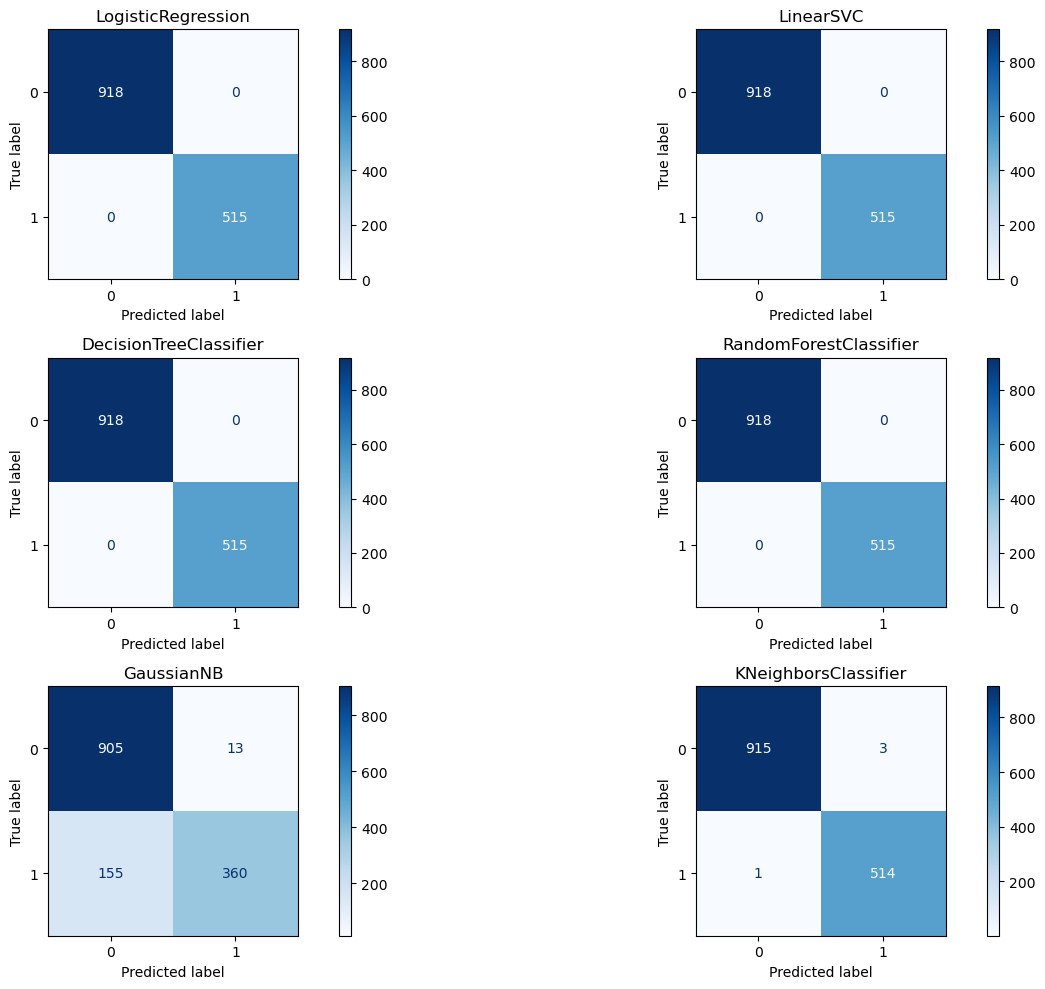

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

classify_ar = [LogisticRegression(), 
               LinearSVC(dual=False),
               DecisionTreeClassifier(), 
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier()]
for cls, ax in zip(classify_ar, axes.flatten()):
    cls.fit(X_train, y_train)
    predictions = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=cls.classes_)
    ax.title.set_text(type(cls).__name__)
    
plt.tight_layout()  
plt.show() 

*The remaining columns are taken into consideration for the Binary classification, aside from log transformed variables. Here, too, the other columns that are eliminated for linear regression are deleted.*
*One hot encoding is not used here to prevent overfitting because the cuisine and subzon have a greater number of distinct values. There is an 80:20 split between the training and testing data.*

*In conclusion, the table presents the outcomes of the binary Classification techniques.*


In [60]:
# binary classification techniques results

df_binClassify_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_binClassify_model['Accuracy'] = accuracy.values()
df_binClassify_model['Precision'] = precision.values()
df_binClassify_model['Recall'] = recall.values()
df_binClassify_model


,Accuracy,Precision,Recall
Logistic_Regression,1.000000,1.000000,1.000000
Support_Vector_Machines,1.000000,1.000000,1.000000
Decision_Trees,1.000000,1.000000,1.000000
Random_Forest,1.000000,1.000000,1.000000
Naive Bayes,0.882763,0.699029,0.965147
K_Nearest_Neighbor,0.997209,0.998058,0.994197


*Naive_Bayes is the worst classification technique overall, according to the confusion matrix depicted above, since 492 False negatives and 0 False positives are discovered.*

*The techniques with the highest accuracy, precision, and recall values are logistic regression and support vector classification. In the confusion matrix above, even the expected TP and TN numbers are high.*
